# <b>Dataset Introduction</b>

## <b>Dataset description </b>

The Georgetown University Multilayer (<a href = "https://gucorpling.org/gum/" target = "_blank">GUM</a>) corpus is a collection of texts gathered and refined through classroom annotation using collaborative software. Collected as an integral component of the linguistics curriculum at Georgetown University, the GUM corpus is specifically oriented toward contemporary English data, it is then tailored to meet the requirements of the corpus and computational linguistics research (Zeldes, 2017).

<table>
<caption><b>Table 1</b>: Documents in the GUM corpus</caption>
 <tr>
  <th>Text tipe</th>
  <th>Source</th>
  <th>Documents</th>
  <th>Tokens</th>
 </tr>
 <tr>
  <td>News (narrative) </td>
  <td>Wikinews</td>
  <td>6</td>
  <td>5051</td>
 </tr>
 <tr>
  <td>Interview (conversational)</td>
  <td>Wikinews</td>
  <td>7</td>
  <td>6535</td>
 </tr>
 <tr>
  <td>How-to (instructional)</td>
  <td>wikiHow</td>
  <td>7</td>
  <td>6701</td>
 </tr>
 <tr>
  <td>Travel guide (informative)</td>
  <td>Wikivoyage</td>
  <td>5</td>
  <td>4369</td>
 </tr>
 <tr>
  <td>Total</td>
  <td></td>
  <td>25</td>
  <td>22.656</td>
 </tr>
</table>

While GUM may be considered small by most standards, comprising around 22,500 tokens, it still exhibits notable frequency in various linguistic categories. Although there are certainly limitations to studies using small corpora many linguistic categories are frequent enough for differences in distribution to be apparent even in a small corpus such as parts of speech, many syntactic phrase types and dependency functions, and even discourse entities and relationships between these.

The students involved in crafting the GUM corpus were granted the flexibility to select any text fitting the criteria of an appropriate length (approximately 500–1000 words based on word-processor count) on a topic of their choice. They could choose from four distinct text types: interviews, news articles, instructional texts, and travel guides. The selection of these types aimed to encompass a range of communicative purposes, including conversational, narrative, instructional, and informative.
To source the texts, a deliberate decision was made to leverage openly available Wiki resources. This approach ensured that news and interview texts could be sourced from Wikimedia's Wikinews, instructional texts from wikiHow, and travel guides from Wikivoyage.

### **Inside-outside-beginning tagging**

The linguistic data in the GUM corpus is presented according to the IOB2, which is the reference format for the purpose of tagging the tokens for name entity recognition task. In such framework, each word is described by a category either within a chunk of multiple words or as a single element. The IOB2 format, which is used in the natural language processing task for this project, uses the B-tag in the beginning of every chunk, the I-tag for the words inside the chunk, while the words outside of chunks are described by the O-tag.

### <b>Entities</b>

A simplified version of the OntoNotes annotation scheme (Weischedel et al., 2012) was employed for entity types in the GUM corpus. This condensed version comprised 11 types, a deliberate choice made to enhance ease of learning and prevent excessively sparse categories within the relatively modest corpus.

<table>
<caption><b>Table 2</b>: GUM entity type annotation scheme compared with OntoNotes</caption>
 <tr>
  <th>GUM</th>
  <th>Subsumes OntoNotes</th>
 </tr>
 <tr>
  <td>PERSON</td>
  <td></td>
 </tr>
 <tr>
  <td>PLACE</td>
  <td>GPE, LOCATION, FACILITY</td>
 </tr>
 <tr>
  <td>ORGANIZATION</td>
  <td>NORP, ORGANIZATION</td>
 </tr>
 <tr>
  <td>OBJECT</td>
  <td>PRODUCT, WORK OF ART and all other concrete objects</td>
 </tr>
 <tr>
  <td>EVENT</td>
  <td></td>
 </tr>
 <tr>
  <td>TIME</td>
  <td>DATE, TIME</td>
 </tr>
 <tr>
  <td>SUBSTANCE</td>
  <td></td>
 </tr>
 <tr>
  <td>PERSON</td>
  <td></td>
 </tr>
 <tr>
  <td>ANIMAL</td>
  <td></td>
 </tr>
 <tr>
  <td>PLANT</td>
  <td></td>
 </tr>
 <tr>
  <td>ABSTRACT</td>
  <td>LANGUAGE, DISEASE, LAW and all other abstractions</td>
 </tr>
 <tr>
  <td>QUANTITY</td>
  <td>PERCENT, MONEY and all other quantities</td>
 </tr>
</table>

Except for OBJECT and ABSTRACT, all other GUM categories are derived from the OntoNotes scheme. However, these categories are extended to encompass non-named and non-coreferring entities. For instance, an unnamed entity like "some country" is still classified as a PLACE, even if it is not explicitly referenced later in the text.

Intangible events, concepts, or abstract notions with a potential for physical realization (such as forms of writing as a process versus an end product) could be classified to some extent as either OBJECT or ABSTRACT. This observation underscores the need for further refinement of guidelines in this particular aspect.


## <b> Loading procedure </b>

The CONLL data format, deriving it's name after the annual Conference on Computational Natural Language Learning, represents data used for natural language processing in a tab-separated format. Each line represents a single word, and the fields that are used to describe the linguistic data are field-separated <a href = "https://universaldependencies.org/format.html" target = "_blank">CONLL</a>. It is commonly used to store data in the IOB2 format.

In the following section, the dataset is loaded and stored in a pandas dataframe where each row represents a sentence and the whitespace-separated tags assigned to each element in the sentence.

<i>The necessary files for running the code can be retrieved from publicly accessible Google Drive [folder](https://drive.google.com/drive/u/0/folders/16zELOP7NHrG0ls_JKCOsMO0VWZ1wgdid)</i>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ner_project

/content/drive/MyDrive/ner_project


In [ ]:
import dataio
import os

In [ ]:
# from current working directory
raw_train, label_train, output_labels = dataio.load_conll_data('gum-train.txt',  only_tokens=True)
raw_test, label_test, _ = dataio.load_conll_data('gum-test.txt',  only_tokens=True)

Reading file gum-train.txt
Read 2494 sentences
Reading file gum-test.txt
Read 999 sentences


## <b>Data augmentation</b>

The training dataset under consideration consists of 44111 element (words, punctuation symbols), which form 2495 sentences. This amount might be considered insufficient for a sucessful training, hence, a data augmentation technique was implemented. The approach used implies replacing tokens in a sentence by another word from the vocabulary of the dataset that has the same tag. This guarantees that the initial tags remain unchanged while simultaneously creating new data instances. This approach has demonstrated improvements in performance, especially for small datasets (Dai and Adel, 2020).

It must be noted that words tagged with 'O' or '*-abstract' are not replaced, since they have a large number of instances in the dataset.

In [ ]:
import random
import numpy as np

In [ ]:
lab_lists = {}

# Iterate over all sentences in the dataset
for sent, labels in zip(raw_train, label_train):
    for word, lab in zip(sent, labels):
        if lab not in lab_lists:
            lab_lists[lab] = []  # Add a new key in the dictionary for tags not previously seen

        # Add the word to the dataset vocabulary
        lab_lists [lab].append(word)

In [ ]:
import numpy as np

In [ ]:
import random # for random number generation

def add_random_sentences(numbers, sentences_list, labels_list, lab_lists):
    for i in numbers: # how many new sentences we want to create
        # split sentences and tags into separate elements of a list
        sent = sentences_list[i]
        lab = labels_list[i]

        phrase = sent.copy() # initialise to the real sentence

        # resample words from the sentence i and replace them with words
        # with the same tags randomly chosen from the dataset vocabulary
        for j in range(len(sent)):
            if lab[j] != 'O' and lab[j][2:] != 'abstract':
                np.random.seed (42)
                phrase[j] = random.choice(lab_lists[lab[j]])

        new_sentence = phrase
        new_lab = lab
        sentences_list.append(new_sentence)
        labels_list.append(new_lab)

    return sentences_list, labels_list

# draw randomly indices for 1000 setnences that will be used to create new sentences
num = np.arange(0, len(raw_train)).tolist()

# draw randomly indices for 500 setnences that will be used to create new sentences
np.random.seed(42)
random_num = np.random.choice(num, 500, replace=False).tolist()

# add the new sentences to the dataset
raw_train, label_train = add_random_sentences(random_num, raw_train, label_train, lab_lists)

# <b> Dataset insights </b>

To promote deeper understanding of the nature of the analysed dataset, as well as the statistical distribution of certain characteristics that may be used to describe the corpus, data visualization tools were applied.

Initially, it is necessary to investigate what are the frequencies of each IOB2 label in the training dataset to determine if the data is balanced, or if some labels are over-represented with respect to the others. Additionally, it is of interest to consider the lengths of the sentences available in the dataset to ensure that informed decisions can be made at later steps, such as, for instance, tokenization.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

In [ ]:
# define function to calculate the len
def len_counter (list):
  lengths = []
  for i in range (len (list)):
    lengths.append (len (list [i]))
  return lengths
sent_lengths = len_counter (raw_train)
sent_lengths = pd.DataFrame(sent_lengths, columns=["Sentence length"])

In [ ]:
import csv
url = "https://github.com/nluninja/nlp_datasets/raw/main/GUM/data/gum-train.conll"
df_dash = pd.read_csv(url, sep='\t', header=None, names=['Word', 'Label'], quoting=csv.QUOTE_NONE)
label_counts = df_dash['Label'].value_counts()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:699: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


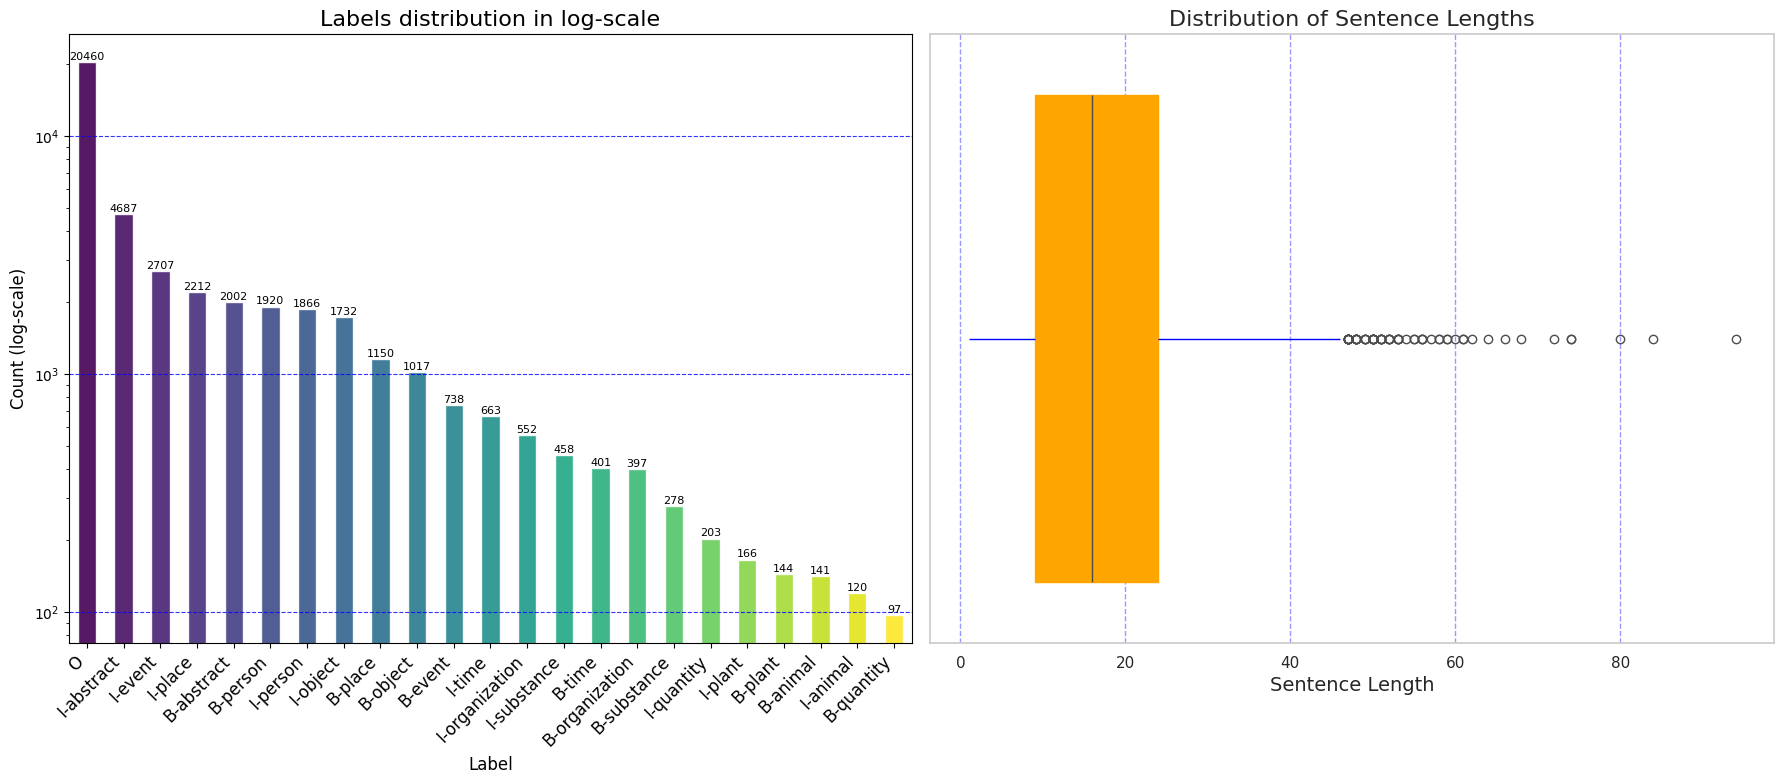

In [ ]:
plt.figure(figsize=(18, 8))

colors = plt.cm.viridis(np.linspace(0, 1, len(label_counts)))
plt.subplot(1, 2, 1)  # Creating subplot (1 row, 2 columns, position 1)
bars = label_counts.plot(kind='bar', color=colors, edgecolor='white', alpha=0.9)
plt.yscale('log')
plt.grid(axis='y', linestyle='--', alpha=0.8, color="blue")
plt.title('Labels distribution in log-scale', fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count (log-scale)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize = 12)

for i, count in enumerate(label_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=8)

# Plotting the box plot
sns.set(style="whitegrid")

plt.subplot(1, 2, 2)  # Creating subplot (1 row, 2 columns, position 2)
ax = sns.boxplot(x=sent_lengths['Sentence length'], color='blue',
                 boxprops=dict(facecolor='blue', color='orange'),
                 whiskerprops=dict(color='blue'), showfliers=True, showcaps=False)

plt.grid(axis='x', linestyle='--', alpha=0.4, color="blue")
plt.title('Distribution of Sentence Lengths', fontsize=16)
plt.xlabel('Sentence Length', fontsize=14)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

The barplot is plotted on the logatithmic scale to have better visualization of the underrepresented categories. It can be observed that the "O" category dominates the other labels, with entities described as plants, animals and quantities are underrepresented.

The boxplot demonstrates the distribution of the lengths of the sentences in our dataset. We can observe the median, the first and the third quartiles, as well as the extreme values. Furthermore the longest sentence consists of 94 tokens.

Moreover, we draw our focus on the differences between the entities: we consider how many words each entity includes, gaining understanding of the possible patterns and the potential outliers. As can be observed below, there are indeed some outliers observed for many entities: hence, the overall distribution is investigated using strip plots to grasp the full distribution of the data. Moreover, since the values are mostly concentrated in the lower part of the range of the distribution, we put focus on that interval to have better understanding of how the main portion of the data is distributed.

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
categories = list (set ([x [2:] for x in output_labels if len (x) > 2])) # without B- / I-
# we are not interested in visualising for 'O' tag, it's trivial

In [ ]:
def entity_length_counter (sentences, iob2_tags, target_label):
    all_chunk_lengths = []  # To store chunk lengths for all sentences

    for sentence_words, sentence_tags in zip(sentences, iob2_tags):
        current_chunk_length = 0  #  keep track of the current chunk' count

        for word, tag in zip(sentence_words, sentence_tags):
            if tag == f"B-{target_label}":
                # encounter B -> set counter to 1
                current_chunk_length = 1
            elif tag == f"I-{target_label}":
                # increment if encounter I-
                current_chunk_length += 1 # will handle even if B- was cut off
            elif tag == "O":
                # 'O' --> close counter, reset
                if current_chunk_length > 0:
                    all_chunk_lengths.append(current_chunk_length)
                    current_chunk_length = 0

        # if end chunk not with IOB, but with EOS
        if current_chunk_length > 0:
            all_chunk_lengths.append(current_chunk_length)
    # store results in pd df for convenience
    chunk_lengths_df = pd.DataFrame({'Index': range(len(all_chunk_lengths)), 'Chunk Length': all_chunk_lengths})
    return chunk_lengths_df


In [ ]:
out = []
for cat in categories:
  out.append (entity_length_counter(raw_train, label_train, cat))

In [ ]:
cat = [x[0].upper() + x [1:] for x in categories]

In [ ]:
def plot_box_strip (dataframe):
    # Extract data from the 'Chunk Length' column
    data = dataframe['Chunk Length']

    # Set color palette
    palette = px.colors.qualitative.Set2

    # Create a DataFrame for the strip plot (data points <= 10)
    box_data = dataframe[dataframe['Chunk Length'] <= 10]

    # Create a strip plot figure
    strip_fig = px.strip(dataframe, y='Chunk Length', title='Strip Plot (All Data)',
                         labels={'Chunk Length': 'Number of Words in Sentences'})
    strip_fig.update_traces(marker=dict(size=10, color=palette[0]))



    # Create a box plot figure
    box_fig = px.box(box_data, y='Chunk Length', title='Box Plot (<= 10)',
                     labels={'Chunk Length': 'Number of Words in Sentences'})
    box_fig.update_traces(marker=dict(color=palette[1]))


    fig = make_subplots(rows=1, cols=2)

    # Add strip plot to the first column
    fig.add_trace(strip_fig.data[0], row=1, col=1)
    fig.update_xaxes(linecolor="black", linewidth=1, mirror=True, range=[-.1, .1], row=1, col=1)
    fig.update_yaxes(linecolor="black", linewidth=1, mirror=True, row=1, col=1, title_text="Length of entities")

    # Add box plot to the second column
    fig.add_trace(box_fig.data[0], row=1, col=2)
    fig.update_xaxes(linecolor="black", linewidth=1, mirror=True, row=1, col=2)
    fig.update_yaxes(linecolor="black", linewidth=1, mirror=True, title_text="Length of entities", row=1, col=2)

    # Update subplot layout
    fig.update_layout(height=600, width=900, title_text='Strip and Box Plots', title_x=0.5,
                     template="seaborn")

    return fig

In [ ]:
from plotly.colors import n_colors
import plotly.graph_objects as go

In [ ]:
def ridge_plot (data, categories):
  colors = n_colors('rgb(5, 200, 200)', 'rgb(200, 10, 10)', len(out), colortype='rgb')
  fig = go.Figure() # create figure

  for i, (df, category, color) in enumerate(zip(data, categories, colors)):
      fig.add_trace(go.Violin(x=df['Chunk Length'], line_color=color, showlegend=False))
      fig.add_annotation(
          go.layout.Annotation(
              x=10,
              y=i + .3,  # Adjust the y-coordinate for proper positioning of the label
              text=category,
              font=dict(family='Arial, sans-serif', size=20, color=color),  # Customize the font style here
              showarrow=False,
              xref='x',
              yref='y',
              align='center'
          )
      )

  fig.update_traces(orientation='h', side='positive', width=3, points=False)
  fig.update_xaxes(linecolor="black", linewidth=1, mirror=True, range=[-1.2, 56])
  fig.update_yaxes(linecolor="black", linewidth=1, mirror=True)
  fig.update_yaxes(ticktext=[], tickvals= [])
  fig.update_layout(xaxis_zeroline=False, yaxis_title ="Categories",
                    title='Entity Length Distribution', template="seaborn",
                    height=600, width=1200)
  return fig

ridge_plot (out, cat)

In [ ]:
%%capture
!pip install dash

In [ ]:
from dash import Dash, dcc, html, Input, Output

In [ ]:
app = Dash(__name__)

In [ ]:
app.layout = html.Div([
    # dropdown menu for selecting categories
    html.Label("Select Category:"),
    dcc.Dropdown(
        id="category-dropdown",
        options=[{'label': cat[i], 'value': i} for i in range(len(cat))] +
        [{'label': 'Overview', 'value': 'overview'}],
        value=0,  # default selected category index
        clearable=False
    ),

    dcc.Graph(id="fig"),
])


In [ ]:
# define callback to update plots based on selected category
@app.callback(
    Output("fig", "figure"),
    Input("category-dropdown", "value")
)
def update_plots(selected_category):
    if selected_category == 'overview':
      fig = ridge_plot (out, cat)
      return fig
    else:
      # get the selected DataFrame based on the index
      selected_dataframe = out[selected_category]

      # create strip plot and box plot using the adapted function
      fig = plot_box_strip(selected_dataframe)

      return fig


In [ ]:
if __name__ == "__main__":
    app.run_server(debug=True, port = 1414)

<IPython.core.display.Javascript object>

At last, we note that it is worthwhile to visualize how the IOB2 labels are assigned for the sentences. This allows to get a better understanding of how the annotation process was conducted, and to gain better understanding of the concepts behind each label.

In [ ]:
import csv
url = "https://github.com/nluninja/nlp_datasets/raw/main/GUM/data/gum-test.conll"
df_dash = pd.read_csv(url, sep='\t', header=None, names=['Word', 'Label'], quoting=csv.QUOTE_NONE)

In [ ]:
# creating a category column made by strings of length 3 (1 in case the label is equal to O)
categories=df_dash.iloc[:,1].unique()

df_dash["Categories"]=df_dash.Label.apply(lambda x:  x[2:5].upper() if len(x)>1 else x)

# creating another column to distinguish sentences
y=[]
j=1
for i in range(df_dash.shape[0]):
   y.append(j)
   if df_dash['Word'][i]=='.':
       j+=1
df_dash['Sentence']=y

In [ ]:
# create a column that assign an increasing integer (starting from 1) to each entity subsequentially
df_dash["count_entities"]=(df_dash[['Categories',"Sentence"]] != df_dash[['Categories',"Sentence"]].shift()).any(axis=1).cumsum()-1 # to make it coincide with entities

# concatenate each word by entity to which it belongs
entities= df_dash.groupby((df_dash[['Categories',"Sentence"]] != df_dash[['Categories',"Sentence"]].shift()).any(axis=1).cumsum())["Word"].apply(lambda x:" ".join(x)).reset_index(drop=True)

In [ ]:
# create a new column that assumes as values the concatenated entity for each entity category sequentially
for i in range( df_dash["count_entities"].iloc[-1]+1 ):
  df_dash.loc[df_dash["count_entities"]==i, ["entity_concat"]] = entities[i]

<ipython-input-41-61be5f2fbeb3>:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Pacific Standard owner' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [ ]:
# input containes only the variables we care about for the dash
df_sentences=df_dash[["entity_concat","Categories", "Sentence"]]
df_sentences=df_sentences[(df_sentences[['Categories',"Sentence"]] != df_sentences[['Categories',"Sentence"]].shift()).any(axis=1)]

In [ ]:
def select_sentence(df, from_s, to_s):
    return df[df['Sentence'].isin(np.arange(from_s, to_s+1))].drop("Sentence", axis=1)

# init the app
app_iob_intro = Dash(__name__)

# the list of unique entity types
unique_entities = df_dash['Categories'].unique()
entity_colors={'OBJ': 'brown', 'O': 'darkgrey', 'ABS': 'tomato', 'PER': 'mediumvioletred',
               'PLA': 'gold', 'ORG': 'darkolivegreen', 'QUA': 'lightgreen', 'EVE': 'turquoise',
               'SUB': 'darkslategrey', 'TIM': 'dodgerblue', 'ANI': 'blue'}


# modify the entname function to add line-height style
def entname(name):
    return html.Span(name, style={
        "font-size": "0.8em",
        "font-weight": "bold",
        "line-height": "1.5",  # Add line height for spacing
        "border-radius": "0.35em",
        "text-transform": "uppercase",
        "vertical-align": "middle",
        "margin-left": "0.5rem"
    })

# modify the entbox function to add line-height style
def entbox(children, color):
    return html.Mark(children, style={
        "background": color,
        "padding": "0.45em 0.6em",
        "margin": "0 0.25em",
        "line-height": "2.5",  # Add line height for spacing
        "border-radius": "0.35em",
    })

def entity(children, name):
    if type(children) is str:
        children = [children]

    children.append(entname(name))
    color = entity_colors.get(name, "black")
    return entbox(children, color)

def render(doc):
    children = []
    for words, ent in zip(doc.iloc[:,0], doc.iloc[:,1]):

        if ent=="O":
          children.append(words)
          if words[-1]==".":
            children.append("\n")
        else:
          children.append(entity(words, ent))
    return children


@app_iob_intro.callback(
    [Output('rendered-content', 'children'),
     Output('entity-frequency-histogram', 'figure')],
    Input('from-s-dropdown', 'value'),
    Input('to-s-dropdown', 'value')
)
def update_rendered_content_and_histogram(from_s, to_s):
    doc = select_sentence(df_sentences, from_s, to_s)
    rendered_content = render(doc)

    # calculate entity frequencies for the selected range
    doc_filtered = doc[doc['Categories'] != 'O']
    entity_frequencies = doc_filtered['Categories'].value_counts()

    # create the histogram
    fig = px.bar(x=entity_frequencies.index, y=entity_frequencies.values, color=entity_frequencies.index, color_discrete_map=entity_colors)

    return rendered_content, fig

# create a layout with titles, dropdowns, rendered content, and the histogram
app_iob_intro.layout = html.Div([
    html.Div([
        html.Label('From sentence'),
        dcc.Dropdown(id='from-s-dropdown',
                     options=[{'label': str(i), 'value': i} for i in range(1, 2032)],
                     value=2),  # Default 'from_s' value
    ], style={'display': 'inline-block', 'margin-right': '20px'}),
    html.Div([
        html.Label('To sentence'),
        dcc.Dropdown(id='to-s-dropdown',
                     options=[{'label': str(i), 'value': i} for i in range(1, 2032)],
                     value=4),  # Default 'to_s' value
    ], style={'display': 'inline-block'}),
    html.Div(id='rendered-content', style={'whiteSpace': 'pre-wrap'}),
    dcc.Graph(id='entity-frequency-histogram', style={'width': '50%', 'height': '50%'})
])

if __name__ == "__main__":
    app_iob_intro.run_server(debug=True)

<IPython.core.display.Javascript object>

# <b> Bidirectional Encoder Representations from Transformers</b>

## <b>Overview</b>
First, we provide a brief overview of the Deep Neural Network architectures that have preceeded the Bidirectional Transformer, which will be implemented further.

### **Encoder-decoder architecture**

Despite the remarkable performance of Deep Neural Networks for a wide range of research tasks, one significant disadvantage is that they require a vector with fixed dimensionality as the input for the network, thus not being able to produce sequence-to-sequence mappings. Multilayered LSTM architecture has enabled the modeling of sequential data by preserving long-range dependencies, which allowed the generation and translation of sequences. However, an efficient approach for sequence-to-sequence pipelines was proposed by Sutskever, Vinyals, and Le in 2014.

<!-- Center-justified image -->
<p align="center">
  <img src="https://i.imgur.com/ehZU6xf.png" alt="Encoder-Decoder Architecture" width = 500>
</p>

<!-- Source link -->
<p align="center">
  <i>Simple encoder-decoder architecture representation.</i>
  <a href="https://temofeev.ru/info/articles/modeli-glubokikh-neyronnykh-setey-sequence-to-sequence-na-pytorch-chast-2/" target="_blank">Source</a>
</p>




The new architecture implied using a multilayered LSTM to process the input sequence to a vector at the first stage, which was taken in as input by the second multilayered deep LSTM to produce the target sequence from the vector. This approach is especially beneficial for natural language processing tasks, since the lengths of the input sentences can vary significantly.


### <b>Transformers</b>

In the paper "Attention is All You Need", a novel approach was proposed that dispensed with the all the recurrent or convolutional elements in the encoder-decoder architecture, while taking advantage of the attention mechanism. This approach demonstrated state of the art performance, surpassing previously achieved results (Vaswani et al., 2017).

<!-- Center-justified image -->
<p align="center">
  <img src="https://i.imgur.com/Qn8ym5s.png" alt="Transformer" height = 600>
</p>

<!-- Source link -->
<p align="center">
  <i>Simple encoder-decoder architecture representation.</i>
  Source: "Attention is All You Need"
</p>

Above, the general structure of a transformer is outlined (Vaswani et al., 2017). The transformer stacks N identical layers of both the encoder and the decoder, thus creating a complicated structure to guarantee good performance.

The transformer relies on the attention mechanism to model dependencies between the tokens in a sequence, and, since the recurrence in the architecture is eliminated, a notable advantage of this method becomes the ability to use parallelization without loss of information of the sequential nature of the data.

The main components of a transfomer architecture are described in the following passages.

<ol type = '1'>
  <li> <b>Embeddings and Positional Encoding</b> </li>
  At the first stage of the network, embeddings are created for the input sequences for the purpose of taking into account word similarity and the co-occurence.  

  An importaint consideration is that, by eliminating the recurrence in the network, the representation of the sequential nature of the data was eliminated. For the purpose of including this information in the input sequences for the model, positional encodings are introduced. For each token in the sequence, the embedding vector is updated according to the following formulae:

  $$ PE_{ \ (pos,\  2i)} = sin \left( \frac{pos}{10000^{{2i}/{dim}}} \right)$$
  $$ PE_{ \ (pos,\  2i + 1)} = cos \left( \frac{pos}{10000^{{2i}/{dim}}} \right)$$

  This method of computation <a href = "https://erdem.pl/2021/05/understanding-positional-encoding-in-transformers#positional-encoding-visualization" target = "_blank">allows</a> to account for both the general location of a word in the sequence, and for the specific order of the words by using the bounded periodic functions of different wavelengths.  
  
  <!-- Center-justified image -->
<p align="center">
  <img src="https://i.imgur.com/bURveFX.png" alt="Positional encodings" width="400">
</p>

<!-- Source link -->
<p align="center">
  <i>Positional encoding values for 4 tokens in positions i = {0, 1, 2, 3}.</i>
  <a href = "https://erdem.pl/2021/05/understanding-positional-encoding-in-transformers#positional-encoding-visualization" target = "_blank">Source</a>
</p>

  <li> <b>Multi-head Attention Layer</b> </li>

  The outstanding advantage of the attention mechanism in the DNN setings is that it allows to include the information about similarities between different tokens in the input for the network, thus guaranteeing a very informative update of the initial word embedding. This approach allows to model the dependencies between the words in the sequence independent of their distance in the sequence, thus guaranteeing a more comprehensive account of the interrelations beetween different words (Vaswani et al., 2017).

  The <a href = "https://jalammar.github.io/illustrated-transformer/" target = "_blank">implementation</a> of the self-attention includes defining three vectors: Query, Key, Value, each of which is inialized by updating the embedding vector using three matrices with different weights obtain during training. Afterwards, for each word, the dot product between the query and the keys is calculated as a measure of similarity, which is then, using the value vectors, transformed in the following way to calculate the attention scores:

  $$Attention \ (Q, \ K, \ V) = softmax \left( \frac{QK^T}{\sqrt{d_K}} \right)V$$

  The embedding for each sequence is then  update according to the attention scores computed for each token.

  A further improvement involves constructing <u> multi-head </u> attention: this implies calculating attention scores separately for different parts of the embedding vector: this allows to capture different patterns in the relationship between words. It must be underlined that this approach does not introduce significant computational burden since it is <a href = "https://towardsdatascience.com/transformers-explained-visually-part-3-multi-head-attention-deep-dive-1c1ff1024853" target = "_blank">possible</a> to perform computations for alll heads simultaneously via matrix multiplication.

  <li> Feedforward layer</li>
  
  A fully-connected feed-forward network is included in the following layer, aimed at learning more complex non-linear relationships between the position-wise encoded representations.

  <li> Decoder </li>
  
  The decoder structure aims at mapping the input obtained from the encoder to the sequence of interest. The decoder includes structure similar to the encoder, where the embeddings and positional encodings are computed, followed by the multi-head attention and the feed-forward layer. Afterwards, the encoder-decoder attentions are calculated with the purpose of incuding full information produced by the encoder, as well as the information introduced while <mask>generating</mask> the previous words in the sequence. Another feed-forward layer is introduced afterwards, and the output is produced accordingly relevant to the research.





### **Transfer learning**

Transfer learning introduces a method for incorporating previous knowledge into a specific research task. This approach enhances the model's performance by leveraging the valuable knowledge already embedded in the weight matrices at the outset of the training data.


### **Bidirectional Encoder Representations from Transformers**

The new model, commonly referred to as BERT, was introduced to take advantage of the transfer learning concept by pre-training deep bidirectional representation of linguistic data. It involves taking into account the context from both the left and the right direction (Devlin et al., 2018).

The architecture is based on the Transformer concept described above, however, it only includes the encoder component. BERT was trained on BooksCorpus and English Wikipedia for two main tasks (Devlin et al., 2018):

<ol>
  <li> <u>Masked language modelling</u> pre-training objective, which implied randomly masking some of the tokens in the input sequences and learning by predicting the masked elements.</li>
  <li> <u>Next sentence prediction</u>, which aimed at understanding the relationships between two sentences. The output of this task was a binary prediction for whether the second sentence is indeed the next sentence prediction. </li>

## <b> Setup for the BERT model </b>

In [ ]:
%%capture
!pip install transformers seqeval[gpu]
# install transformers library from huggingface that has all the functions necessary
# for running the BERT pretrain
# and the seqeval for evaluations (f1, precision, recall)
# [gpu] to support the gpu acceleration

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score # for reporting metrics
import torch # for building the pytorch DNN architecture
from torch.utils.data import Dataset, DataLoader # to create the iterable loader for
# model training
from transformers import BertTokenizer, BertForTokenClassification # import the
# tokenizer provided by Hugging Face and the pretrained BERT model

In [ ]:
# all computations will be performed on the GPU for increasing time efficiency
from torch import cuda
device = 'cuda' if cuda.is_available() else 'cpu'
print(device)

cuda


Data manipulation for this section will be performed using the <a href = "https://pandas.pydata.org/" target = "_blank">pandas</a> library functionality. For that purpose, the dataset has been traisformed  into a pandas data frame.

In [ ]:
df_train_s = pd.DataFrame({'Sentence': [" ".join  (sentence) for sentence in raw_train],
                              'Label': [" ".join  (label) for label in label_train]})
df_test_s = pd.DataFrame({'Sentence': [" ".join  (sentence) for sentence in raw_test],
                              'Label': [" ".join  (label) for label in label_test]})

To use the pretrained BERT model, it is necessary to create the mapping from the string-represented IOB2 tags to numeric identification indexes for each tag.

In [ ]:
label2id = {k: v for v, k in enumerate(output_labels)} # select the index
id2label = {v: k for v, k in enumerate(output_labels)} # select the label name

### **Tokenization**

The first step in natural [language](https://who.net) processing task is to transform the string-represented data into the form that can be processed by a machine learning model.

Using wordpieces gives a good balance between the
flexibility of single characters and the efficiency of full words for decoding, and also sidesteps the need for
special treatment of unknown words.

The <u>full</u> tokenizer implementation performs the a wide range of tasks, including:
<ol>
  <li> Each word in the sentence is tokenized using wordpiece tokenization.  </li>
  Wordpiece approach provides a balance between flexibility for tokenizing single characters without loss in efficiency of full word decoding (Wu et al., 2016). In order to preserve the tagging for wordpieces, a special function <i>(tokenize_and_preserve_labels ())</i> adapted from the following Github <a href="https://github.com/NielsRogge/Transformers-Tutorials/tree/master/BERT" target="_blank">Repository</a> was implemented to carry the tags over to the newly created tokens.
  <li> Adds the new tokens to the vocabulary </li>
  <li> Adds padding or truncating, based on the maximum length of the sequence provided as an actual parameter to the tokenizer</li>
  <ul type = 'circle'>
  <li> Padding is necessary in order for the network to be able to accept as input sequences of different lengths in every batch it processes. </li>
  <li> Maximum sequence length</li>
  The decision ought to be made taking into consideration both the need to avoid excessive padding and to avoid eliminating important information by truncation.
  </ul>
  <li>Creates the attention mask
  <ul type = 'circle'>
  <li> An Attention mask is necessary in order to signal to the model not to processs the padding tokens. Thus, it guarantees that the attention scores for the padding tokens are not taken into account during training.</li>
  </ul>
  <li> Creates special tokens:</li>
  <ol>
    <li>CLS: the classifier token, to signal the beginning of each sequence</li>
    <li>SEP: the separator token, to separate multiple sequences within one input sequence; also used as the last token in a sequence
    <li>Other tokens, such as EOS, not relevant to the current task. </li>
</ol>

To determine the optimal maximum length of the input sequence, the distribution of the sentences tokenized using the wordpiece methodology was implemented.

In [ ]:
%%capture
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
raw_tokens = []
for i in range (df_train_s.shape [0]):
  # tokenize each sentence in the training dataset
  raw_tokens.append (tokenizer.tokenize (df_train_s.iloc [i] [0]))
raw_tokens_len = len_counter (raw_tokens) # calculate length of each token
raw_tokens_len = pd.DataFrame({'Token length': [t for t in raw_tokens_len]}) # for plotting

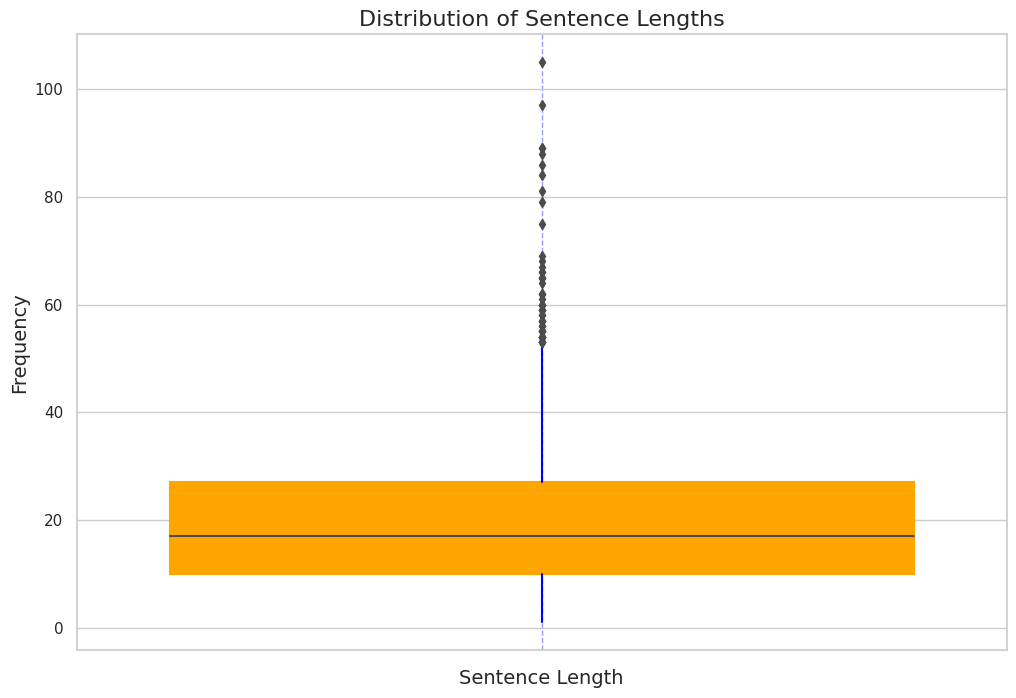

In [ ]:
plt.figure(figsize=(12, 8))

sns.set(style="whitegrid")

#plt.subplot(1, 2, 2)  # Creating subplot (1 row, 2 columns, position 2)
ax = sns.boxplot(y=raw_tokens_len ['Token length'], color='blue',
                 boxprops=dict(facecolor='blue', color='orange'),
                 whiskerprops=dict(color='blue'), showfliers=True, showcaps=False)

plt.grid(axis='x', linestyle='--', alpha=0.4, color="blue")
plt.title('Distribution of Sentence Lengths', fontsize=16)
plt.xlabel('Sentence Length', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

#plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Based on the distribution of the lengths of the tokenized sentences, the decision has been made to set the threshold for truncating the input sequences at 50 in order to provide that the 1.5 IQR of the distribution while disregarding the sentences with extreme values for the lengths.

Below the proper tokenization is implemented.

In [ ]:
MAX_LEN = 50
def tokenize_and_preserve_labels (sentence, text_labels, tokenizer):

    # feed to the function each sentence, the labels and the method for
    # tokenisation. this helps ensure that, even if one single word
    # is split into "several tokens" i.e. wordpieces, the entity labels are
    # preserved for each "piece"

    tokenized_sentence = []
    labels = []

    sentence = sentence.strip() # remove leading and trailing whitespace

    for word, label in zip(sentence.split(), text_labels.split(" ")):

        # Tokenize the word and count # of subwords the word is broken into
        tokenized_word = tokenizer.tokenize(word)
        n_subwords = len(tokenized_word)

        # Add the tokenized word to the final tokenized word list
        tokenized_sentence.extend(tokenized_word)

        # Add the same label to the new list of labels `n_subwords` times
        labels.extend([label] * n_subwords)

    return tokenized_sentence, labels

Further, a special class Dataset (adapted from the following Github <a href="https://github.com/NielsRogge/Transformers-Tutorials/tree/master/BERT" target="_blank">Repository</a>) is implemented in order to prepare the data to be used by the BERT pretrained model. For instance, it is necessary to add the special tokens, truncate or pad the sentences according to the maximum sentence length chosen, and assign the IOB2 tokens to the new elements. It also transforms a data frame into a PyTorch tensor.

Additionally, it is important to note that each instance of the Dataset class will include the vector with token identifications, the attention mask, as well as the tags assigned to each word in the initial dataset: this will allow to calculate evaluation metrics during training.


In [ ]:
class dataset(Dataset):
    # create an instance of the dataset class with following attributes:
    def __init__(self, dataframe, tokenizer, max_len):
        self.len = len(dataframe)
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __getitem__(self, index):
        # step 1: tokenize (and adapt corresponding labels)
        sentence = self.data.Sentence [index]
        word_labels = self.data.Label [index]
        tokenized_sentence, labels = tokenize_and_preserve_labels (sentence, word_labels, self.tokenizer)

        # step 2: add special tokens (and corresponding labels)
        tokenized_sentence = ["[CLS]"] + tokenized_sentence + ["[SEP]"] # add special tokens
        labels.insert(0, "O") # add outside label for [CLS] token
        labels.insert(-1, "O") # add outside label for [SEP] token

        # step 3: truncating/padding
        maxlen = self.max_len

        if (len(tokenized_sentence) > maxlen):
          # truncate sentences that are longer than the maxlen set
          tokenized_sentence = tokenized_sentence[:maxlen]
          labels = labels[:maxlen]
        else:
          # pad sentences that are shorter
          tokenized_sentence = tokenized_sentence + ['[PAD]'for _ in range(maxlen - len(tokenized_sentence))]
          labels = labels + ["O" for _ in range(maxlen - len(labels))]

        # step 4: obtain the attention mask
        attn_mask = [1 if tok != '[PAD]' else 0 for tok in tokenized_sentence] # do not pay attention to padding

        # step 5: convert tokens to input ids
        ids = self.tokenizer.convert_tokens_to_ids(tokenized_sentence)

        label_ids = [label2id[label] for label in labels] # transform to numeric

        return {
              'ids': torch.tensor(ids, dtype=torch.long), # tokens for the sentence
              'mask': torch.tensor(attn_mask, dtype=torch.long), # attention mask
              'targets': torch.tensor(label_ids, dtype=torch.long)  # labels
        }

    def __len__(self):
        return self.len

The pretrain allows to obtain high performance results, however, some of the input parameters ought to be chosen carefully. One approach is to estimate the performance of the models trained on those different hyperparamenters, by splitting the dataset into training and validation sets, and using the latter to record performance metrics and compare the outcomes of different parametrisation (James et al., 2013).

Due to the relatively small size of the training dataset, in order to obtain appropriate validation results, k-fold cross validation was performed (Heaton, 2018). The dataset was split into 5 parts, and the average metrics for the training on 5 different subsets of data will be estimated on non-overlapping validation sets, and subsequently their average will be considered in order to
fine-tune the model and make an informed decision on the choice of the hyperparameters.

  <!-- Center-justified image -->
<p align="center">
  <img src="https://i.imgur.com/kYEeF7Y.png" alt="k-fold CV" width = 500>
</p>

<!-- Source link -->
<p align="center">
  <i>Visualization for k-fold cross-validation.</i>
  <a href="https://docs.ultralytics.com/guides/kfold-cross-validation/#introduction" target="_blank">Source</a>
</p>


In [ ]:
from sklearn.model_selection import KFold

k_folds = 5

# Initialize KFold
kf = KFold(n_splits=k_folds, shuffle=False) # randomisation not used to preserve
# the structure for the validation set

# Create a list to store your k datasets
fold_datasets = []

# Split the data into k folds
for train_index, val_index in kf.split(df_train_s):
    train_data, val_data = df_train_s.iloc[train_index], df_train_s.iloc[val_index]

    # Create dataset instances for training and validation
    train_dataset = dataset(train_data, tokenizer, MAX_LEN)
    val_dataset = dataset(val_data, tokenizer, MAX_LEN)


    fold_datasets.append((train_dataset, val_dataset))

# Now fold_datasets contains k tuples, each with a training dataset and a validation dataset


### <b>Pretrained model</b>

For this analysis, the base BERT model from the <a href="https://huggingface.co/bert-base-uncased" target="_blank">Hugging Face</a> open platform was used. It was pretrained in a self-supervised way using the masked language modelling approach on English language, and does not distinguish between capitalised and lowercase characters.

In particular, for the named entity recognition task, the BERT model with token classification head on top is implemented further. It adheres to the following structure <i> (the details on the implementation are described according to the <a href="https://github.com/huggingface/transformers/blob/main/src/transformers/models/bert/modeling_bert.py#L1716" target = "_blank"> source code</a>)</i>:

<ol>
  <li><b>Bert model</b></li>
  The first step that the model takes is creating embeddings for each token in each sentence, utilising the extensive vocabulary that includes 30522 tokens, which is the input size for the nn.Embeding layer, and 768 is the hidden layer dimension for the BERT model, which is also the output size of the resulting vector with the embeddings. Afterwards, positional embeddings are implemented, and they are created as a simple Embedding layer as well, without utilising the trigonometric functions described above. As per the leader of the the ML and Society team,  <a href=" https://discuss.huggingface.co/t/why-positional-embeddings-are-implemented-as-just-simple-embeddings/585" target="_blank">Yacine Jernite</a>, although the method proposed by Vaswani et al. generalises better to new data, the learned embeddings allow for faster training. Subsequently, the embeddings and positional encodings are summed up, and a normalization layer is applied to the result.
  
  The normalization layer performs normalization for the batch of the inputs according to the following <a href="https://pytorch.org/docs/stable/generated/torch.nn.LayerNorm.html" target="_blank">formula</a>:

  $$y = \frac{x - E[x]}{\sqrt{Var[x] + ϵ}}*γ + β,$$

  where the mean and the standard deviation would be calculated over the last 768 dimensions, with $ϵ$ stabilisation term. Layer normalization is applied for the purpose of decreasing the coomputational burden by normalizing the input to the neuron (Ba, Kiros, and Hinton, 2016).

  The final layer in the Bert model is the Dropout which is aimed at regularization: some randomly selected (with probability 0.1) neurons are omitted from the training step (Heaton, 2018).  

  
  <li><b>Encoder</b></li>
  At this step, the model enters the encoder architecture, which consists of 12 identical layers of the actual encoder block: the multy-headed attention layer and the feed forward layer.  There are 12 attention heads specified in the architecure. After attention score computations, a dropout layer is applied for normalization.

  The feed-forward layer consists of a linear layer, normalization and dropout.
  <li><b>Intermediate layer</b> </li>
  At this stage, the hidden dimensions are expanded to 4 times the previous size (Sridhar and Sarah, 2023).The  the GELU activation was <a href = "https://github.com/huggingface/transformers/blob/main/src/transformers/activations.py" target = "_blank">implemented </a>:

  $$ 0.5  x * \left( 1 + \frac {2}{ \sqrt{\pi}} \  \int_{0}^{\frac {x}{\sqrt 2}} e^{-t^2} \,dt \right) $$

  The benefit of using the GELU function, rather than the RELU, is that it provides a way to capture the nonlinearity advantage of the RELU function while combining it with the benefits of stochastic regularization using dropout (Hendrycks and Gimpel, 2016). As such, the GELU activation also multiplies the input values by 0 or by 1, but the probability to have a value of zero depends on the actual value of the input, since the standard Normal cumulative distribution function is used.

  <!-- Center-justified image -->
<p align="center">
  <img src="https://i.imgur.com/ICcPYb1.png" alt="GELU" width = 400>
</p>

<!-- Source link -->
<p align="center">
  <i>GELU function, comparison with ReLu.</i>
  <a href="https://www.researchgate.net/publication/370116538_Automatic_Building_Height_Estimation_Machine_Learning_Models_for_Urban_Image_Analysis" target="_blank">Source</a>
</p>

  <li> <b>Output</b> </li>
  In this layer, the size of the hidden layer is scaled back to 768, normalised, and regularization is applied.
  <li> <b>Classification head</b></li>
  Since the task for this project is token classification, the BERT pretrain with a classification head added to it was implemented.  As such, it applies a dropout layer and with a linear layer produces logits for each category that is present in the dataset.
</ol>

In [ ]:
model = BertForTokenClassification.from_pretrained('bert-base-uncased',
                                                   num_labels=len(id2label),
                                                   id2label=id2label,
                                                   label2id=label2id)
model.to(device) # move the model to GPU for computations

In [ ]:
config = model.config

# Find the number of attention heads
num_attention_heads = config.num_attention_heads

print(f"The model has {num_attention_heads} attention heads.")

In the following code chunk, some parameters for the model specifications are set.

<ol>
  <li> Batch size</li>
  Batching is used for the efficiency of optimization: choosing an optimal batch size allows to preserve the computational benefits of stochastic gradient descent while reducing the variability that is introduced by the sampling error (Aggarwal, Aggarwal, and Lagerstrom-Fife, 2020). Due to the relatively small size of the dataset, and the fact that the GPU resources are most efficiently use for match sizes of powers of two, both the training and the validation batch sizes were set to 8.
  <li>Number of epochs</li>
  The training will be performed on 15 epochs to guarantee that the pretrained model learns from the provided training dataset.
  <li>Gradient clipping</li>
  This specification is necessary to prevent the problem of an exploding gradient, which occurs when the gradient values become too large with respect to the model parameters, which leads to the updates being too large and hinders convergence (Aggarwal, Aggarwal, and Lagerstrom-Fife, 2020). This is addressed by introducing a condition in the training function that would clip the gradient to the pre-specified value if the value of its norm becomes too large.
</ol>

In [ ]:
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 8

EPOCHS = 15

MAX_GRAD_NORM = 10

## <b>Cross-validation step</b>

In order to perform the update of the weights of the pretrained BERT model in an efficient manner to introduce the information from the training dataset, and to train the model to recognize the IOB2 tags used in the GUM corpus, an appropriate optimization strategy must be implemented. The performance of three optimizers on the dataset has been investigated using the K-fold cross-validation approach, with each of the strategies described below.

<ol>
  <li><b>Adam</b></li>
  Combines the benefits of the RMSProp algorithm, which uses moving averages of the squares of the values of gradients for previous ierations in order to prevent oscillations during the optimization process, with the advantages of the momentum techniques that build the inertia that allows to tackle local minuma. The learning rates are thus adapted at each step according to the historical information on the previous steps of the algorithm.

  <li><b>AdamW</b></li>
  This optimization algorithm <a href = "https://towardsdatascience.com/why-adamw-matters-736223f31b5d" target = "_blank">builds on</a> the Adam algorithm by changing the way the weight control, which aims at avoiding the overfitting, is applied: only the current value of the gradient is corrected, with the historical gradient remaining without the correction. This method was introduced because the initial implementation of the weight decay is not appropriate for adaptive algorithms (Loshchilov and Hutter, 2017).  
  <li><b>Ranger</b></li>
  <a href = "https://danielhanchen.github.io/optimizers/sota%20optimizers.htm target = "_blank"> Ranger</a> is a new optimization algorithm introduced in 2019 which combines rectified Adam with Lookahead into a single optimizer. RAdam <a href = "https://paperswithcode.com/method/radam" target = "_blank">aims at</a> reducing the variance of the adaptive learning rate, especially in the beginning of the learning process, leading to better convergence results. Lookahead algorithm updates two sets of weights at each iterations: the fast weights are optimized k times by a fast optimization algorithms, and the result of this procedure are used to determine the update of the small weights, providing more stable results during the training (Zhang et al., 2019).

</ol>

Below, the functions for training the model and validating it are specified, later combined to a single function that performs those operations on each of the folds used for cross-validation.

In [ ]:
def train(epoch, model, optimizer, data, weights=False):
    np.random.seed (42)

    #initialise some variables:

    # lists with loss and accuracy values
    loss_values, accuracy_values = [], []

    # training loss and accuracy
    tr_loss, tr_accuracy = 0, 0

    # counters for cumulative batch sizes and batch iterations:
    nb_tr_examples, nb_tr_steps = 0, 0

    # variables for storing the output:
    tr_preds, tr_labels = [], []

    # move to gpu, if available
    model.to (device)
    # put model in training mode
    model.train()

    for idx, batch in enumerate(data): # iterate over the loader iterable

        # move all the data to the same device the model's already at
        ids = batch['ids'].to(device, dtype = torch.long)
        mask = batch['mask'].to(device, dtype = torch.long)
        targets = batch['targets'].to(device, dtype = torch.long)
        # for each batch I extract this information

        # actually apply the bert specifications, with the
        # pretrained weights at first iteration:
        outputs = model(input_ids=ids, attention_mask=mask, labels=targets)

        # save the outputs logits of the linear classification
        tr_logits = outputs.logits

        if weights==False:
            # save the outputs: the loss and the logits of the linear classification
            loss = outputs.loss
            # accumulate the loss over all the iterations so that we can keep track over the average loss for all batches:
            tr_loss += loss.item()

        # increment the step, i.e. + 1 for each batch we go through at this epoch
        nb_tr_steps += 1

        # increment the size, i.e. the number of rows so far considered in each batch cumulatively
        nb_tr_examples += targets.size(0)

        ################################
        ### compute training accuracy###

         # 'targets' i.e. the true labels, in flattened format
        flattened_targets = targets.view(-1) # shape (batch_size * seq_len,)

        # the linear classification logits for the current batch
        active_logits = tr_logits.view(-1, model.num_labels) # shape (batch_size * seq_len, num_labels)

        # take the active logits and just using argmax choose the prediction
        flattened_predictions = torch.argmax(active_logits, axis=1) # shape (batch_size * seq_len,)

        # now, use mask to determine where we should compare predictions with targets (includes [CLS] and [SEP] token predictions)
        active_accuracy = mask.view(-1) == 1 # active accuracy is also of shape (batch_size * seq_len,)

        # only choose relevant targets & predictions
        targets = torch.masked_select(flattened_targets, active_accuracy)
        predictions = torch.masked_select(flattened_predictions, active_accuracy)

        if weights==True:
          loss = loss_fn(active_logits.float(), flattened_targets)
          tr_loss += loss.item()

        # calculate accuracy for the current batch:
        tmp_tr_accuracy = accuracy_score(targets.cpu().numpy(), predictions.cpu().numpy())
        tr_accuracy += tmp_tr_accuracy
        ################################

        # store labels and predictions in the list:
        tr_preds.extend(predictions)
        tr_labels.extend(targets)

        loss_step = tr_loss/nb_tr_steps
        loss_values.append(loss_step)
        accuracy_step=tr_accuracy/nb_tr_steps
        accuracy_values.append(accuracy_step)

        # gradient clipping
        torch.nn.utils.clip_grad_norm_(
            parameters=model.parameters(), max_norm=MAX_GRAD_NORM
        )

        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    epoch_loss = tr_loss / nb_tr_steps
    tr_accuracy = tr_accuracy / nb_tr_steps
    return epoch_loss, tr_accuracy, loss_values, accuracy_values

In [ ]:
def valid(model, data, testing = False):
    np.random.seed (42)

    # put model in evaluation mode
    model.eval()

    # initialise loss & accuracy on validation to 0
    eval_loss, eval_accuracy = 0, 0

    # same with number of rows & the number of batches considered
    nb_eval_examples, nb_eval_steps = 0, 0

    # same with the predictions and labels we will compare
    eval_preds, eval_labels = [], []
    loss_values_val, accuracy_values_val = [], []

    with torch.no_grad():
      # we will evaluate  for each batch, but are only interested in the final one, so will evarage
        for idx, batch in enumerate(data):

            # move everything to gpu
            ids = batch['ids'].to(device, dtype = torch.long)
            mask = batch['mask'].to(device, dtype = torch.long)
            targets = batch['targets'].to(device, dtype = torch.long)

            # get the predictions (the logits) by running the model on the validation data
            outputs = model(input_ids=ids, attention_mask=mask, labels=targets)
            loss, eval_logits = outputs.loss, outputs.logits

            # accumulate the loss
            eval_loss += loss.item()

            # increment those to get the averages
            nb_eval_steps += 1
            nb_eval_examples += targets.size(0)

            ################################
            ### compute evaluation accuracy###

            # 'targets' i.e. the true labels, in flattened format
            flattened_targets = targets.view(-1) # shape (batch_size * seq_len,)

            # the linear classification logits for the current batch
            active_logits = eval_logits.view(-1, model.num_labels) # shape (batch_size * seq_len, num_labels)

            # take the active logits and just using argmax choose the prediction
            flattened_predictions = torch.argmax(active_logits, axis=1) # shape (batch_size * seq_len,)

            # now, use mask to determine where we should compare predictions with targets (includes [CLS] and [SEP] token predictions)
            active_accuracy = mask.view(-1) == 1 # active accuracy is also of shape (batch_size * seq_len,)

            # only choose relevant targets & predictions
            targets = torch.masked_select(flattened_targets, active_accuracy)
            predictions = torch.masked_select(flattened_predictions, active_accuracy)

            eval_labels.extend(targets)
            eval_preds.extend(predictions)

            # calculate the accuracy for the current batch:
            tmp_eval_accuracy = accuracy_score(targets.cpu().numpy(), predictions.cpu().numpy())
            eval_accuracy += tmp_eval_accuracy

            loss_stored=eval_loss/nb_eval_steps
            accuracy_stored=eval_accuracy/nb_eval_steps

            loss_values_val.append(loss_stored)
            accuracy_values_val.append(accuracy_stored)
            ################################



    # convert back to labels so that they can be used for classification report
    labels = [id2label[id.item()] for id in eval_labels]
    predictions = [id2label[id.item()] for id in eval_preds]

    eval_loss = eval_loss / nb_eval_steps
    eval_accuracy = eval_accuracy / nb_eval_steps

    if testing:
      return eval_loss, eval_accuracy, labels, predictions,  loss_values_val, accuracy_values_val
    else:
      return eval_loss, eval_accuracy, loss_values_val, accuracy_values_val

In [ ]:
def k_fold(epoch, folds_data, optimizer_choice='Adam', weights=False):

    # initialise variables for storing
    eval_labels, eval_preds = [], []
    loss_values_list, accuracy_values_list= [], []
    loss_values_list_val = []
    accuracy_values_list_val= []
    tr_loss, tr_acc = 0, 0
    avg_tr_acc = 0; avg_val_acc = 0
    i = 0

    for fold, (train_dataset, val_dataset) in enumerate(folds_data):
      # reload the model so that for each fold it will train from scratch:
        model = BertForTokenClassification.from_pretrained('bert-base-uncased',
                                                   num_labels=len(id2label),
                                                   id2label=id2label,
                                                   label2id=label2id)

        loss_values_list.append([])
        accuracy_values_list.append([])
        loss_values_list_val.append([])
        accuracy_values_list_val.append([])

        model.to(device)

        # in this part, we choose on which optimization strategy to train the mode
        if optimizer_choice=='Adam':
            optimizer = torch.optim.Adam(params=model.parameters(), lr=LEARNING_RATE_A, betas = BETAS_A, weight_decay = WEIGHT_DECAY_A)
        elif optimizer_choice=='AdamW':
            optimizer = AdamW(model.parameters(), lr=LEARNING_RATE_AW, betas = BETAS_AW, weight_decay=WEIGHT_DECAY_AW)
        elif optimizer_choice =='Ranger':
            optimizer = Ranger(model.parameters(), lr=LEARNING_RATE_R, k = k, weight_decay=WEIGHT_DECAY_R)
        else:
            raise ValueError("Invalid optimizer type. Supported types are 'Adam','AdamW' and 'Ranger'.")

        print(f"Training on fold {fold + 1}...")
        train_dataset.data = train_dataset.data.reset_index(drop=True)
        val_dataset.data = val_dataset.data.reset_index(drop=True)

        # fix batch sizes
        train_dataloader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True)
        val_dataloader = DataLoader(val_dataset, batch_size=VALID_BATCH_SIZE, shuffle=False)


        for e in range(epoch):

            if weights==False:
                tr_loss, tr_acc,  loss_values, accuracy_values = train (e, model, optimizer, train_dataloader) # the values for the
            # last epoch will be saved when exit the for loop
            else:
                tr_loss, tr_acc,  loss_values, accuracy_values = train (e, model, optimizer, train_dataloader, weights=True)

            # Append values from each epoch to the lists
            loss_values_list[i].extend(loss_values)
            accuracy_values_list[i].extend(accuracy_values)

        avg_tr_acc += tr_acc
        print(f"For fold {fold + 1}, the training metrics are: \nloss: {tr_loss}, accuracy: {tr_acc}")

        val_loss, val_acc, loss_values_val, accuracy_values_val = valid(model, val_dataloader)

        avg_val_acc += val_acc

        loss_values_list_val[i].extend(loss_values_val)
        accuracy_values_list_val[i].extend(accuracy_values_val)
        print(f"For fold {fold + 1}, the validation metrics are: \nloss: {val_loss}, accuracy: {val_acc}")

        i += 1

    return (avg_tr_acc / k_folds), (avg_val_acc / k_folds),  loss_values_list, accuracy_values_list, loss_values_list_val, accuracy_values_list_val


### <b>Adam optimizer</b>

The learning rate and the momentum parameters are set in accordance with the parameters used for training the model, weight decay set to 0.

In [ ]:
LEARNING_RATE_A = 1e-4
BETAS_A = (0.9, 0.999)
WEIGHT_DECAY_A = 0

In [ ]:
adam_tr_acc, adam_val_acc, adam_loss_values_list, adam_accuracy_values_list, adam_loss_values_list_val, adam_accuracy_values_list_val = k_fold (EPOCHS, fold_datasets, weights = True)

In [ ]:
# save the model:
model.save_pretrained('/content/drive/MyDrive/datavis_project/models_valid/adam')

In [ ]:
Adam=dict()
Adam['labels']=adam_labs
Adam['predictions']=adam_preds
Adam['loss_values_list']= adam_loss_values_list
Adam['accuracy_values_list']=adam_accuracy_values_list
Adam['loss_values_list_val']=adam_loss_values_list_val
Adam['accuracy_values_list_val']=adam_accuracy_values_list_val

In [ ]:
import json # to save files

file_path = "/content/drive/MyDrive/datavis_project/Adam.json"
data_to_save = Adam

# save results
with open(file_path, 'w') as json_file:
    json.dump(data_to_save, json_file)

### <b>AdamW optimizer</b>

The same parameters were chosen for AdamW as were for Adam, but the weight decay was introduced.

In [ ]:
from transformers import AdamW # import module with AdamW

In [ ]:
LEARNING_RATE_AW = 1e-4
BETAS_AW = (0.9, 0.999)
WEIGHT_DECAY_AW = 0.01

In [ ]:
adamw_tr_acc, adamw_val_acc, adamw_labs, adamw_preds, adamw_loss_values_list, adamw_accuracy_values_list, adamw_loss_values_list_val, adamw_accuracy_values_list_val = k_fold (EPOCHS, fold_datasets,optimizer_choice='AdamW')

In [ ]:
model.save_pretrained('/content/drive/MyDrive/datavis_project/models_valid/adamW')

In [ ]:
AdamW=dict()
AdamW['labels']=adamw_labs
AdamW['predictions']=adamw_preds
AdamW['loss_values_list']= adamw_loss_values_list
AdamW['accuracy_values_list']=adamw_accuracy_values_list
AdamW['loss_values_list_val']=adamw_loss_values_list_val
AdamW['accuracy_values_list_val']=adamw_accuracy_values_list_val

In [ ]:
file_path = "/content/drive/MyDrive/datavis_project/AdamW.json"
data_to_save = AdamW

with open(file_path, 'w') as json_file:
    json.dump(data_to_save, json_file)

## <b> Ranger optimizer </b>

Parameters for the Ranger optimizer were chosen according with the common practice in implementing it.

In [ ]:
%%capture
!pip install pytorch-ranger

In [ ]:
from pytorch_ranger import Ranger # import module with ranger

In [ ]:
LEARNING_RATE_R = 1e-4
k = 6
WEIGHT_DECAY_R = 0.1

In [ ]:
ranger_tr_acc, ranger_val_acc, ranger_labs, ranger_preds, ranger_loss_values_list, ranger_accuracy_values_list, ranger_loss_values_list_val, ranger_accuracy_values_list_val = k_fold (EPOCHS, fold_datasets,optimizer_choice='Ranger')

In [ ]:
model.save_pretrained('/content/drive/MyDrive/datavis_project/models_valid/ranger')

In [ ]:
Ranger=dict()
Ranger['labels']=ranger_labs
Ranger['predictions']=ranger_preds
Ranger['loss_values_list']= ranger_loss_values_list
Ranger['accuracy_values_list']=ranger_accuracy_values_list
Ranger['loss_values_list_val']=ranger_loss_values_list_val
Ranger['accuracy_values_list_val']=ranger_accuracy_values_list_val

In [ ]:
file_path = "/content/drive/MyDrive/datavis_project/Ranger.json"
data_to_save = Ranger
# save results
with open(file_path, 'w') as json_file:
    json.dump(data_to_save, json_file)

In [ ]:
Methods=dict()
Methods['Adam']=Adam
Methods['AdamW']=AdamW
Methods['Ranger']=Ranger

file_path = "/content/drive/MyDrive/datavis_saved/first_run/Methods.json"

data_to_save = Methods
# save results
with open(file_path, 'w') as json_file:
    json.dump(data_to_save, json_file)

### <b>Best optimizer obtained by cross validation results comparison</b>

In [ ]:
import json

In [ ]:
file_path = "/content/drive/MyDrive/ner_project/Methods.json"

# Read data from the JSON file
with open(file_path, 'r') as json_file:
    methods = json.load(json_file)

In [ ]:
%%capture
!pip install dash

In [ ]:
import plotly.figure_factory as ff
from dash import dcc, html, Dash
from dash.dependencies import Input, Output
import plotly.graph_objects as go
from plotly.subplots import make_subplots  # Import make_subplots
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import plotly.express as px
import pandas as pd

In [ ]:
app = Dash(__name__)

app.layout = html.Div(children=[
    dcc.Dropdown(
        id='dict-dropdown',
        options=[
            {'label': 'Adam', 'value': 'Adam'},
            {'label': 'AdamW', 'value': 'AdamW'},
            {'label': 'Ranger', 'value': 'Ranger'}
        ],
        value='Adam',
        style={'width': '50%'}
    ),
    dcc.Graph(
        id='loss-and-accuracy',
        config={'displayModeBar': False}  # Hide tools bar to save space
    ),
    dcc.Graph(
        id='comparison',
    )
])


@app.callback(
    [Output('loss-and-accuracy', 'figure'),
     Output('comparison', 'figure')],
    [Input('dict-dropdown', 'value')]
)
def update_graph(selected_dict):
    fig_loss_and_accuracy = make_subplots(rows=2, cols=2, subplot_titles=['Loss', 'Zoomed Loss', 'Accuracy', 'Zoomed Accuracy'])

    fold_labels_loss = [f'Fold {i + 1}' for i in range(len(methods[selected_dict]['loss_values_list_val']))]
    fold_labels_acc = [f'Fold {i + 1}' for i in range(len(methods[selected_dict]['accuracy_values_list_val']))]

    index_max = np.argmax([sequence[-1] for sequence in methods[selected_dict]['accuracy_values_list_val']])

    # loss plot
    for i, (sequence, label) in enumerate(zip(methods[selected_dict]['loss_values_list'], fold_labels_loss)):
        color = 'lightgrey' if i != index_max else 'black'
        fig_loss_and_accuracy.add_trace(go.Scatter(y=sequence, mode='lines+markers', marker=dict(color=color, size=0.2), name=label), row=1, col=1)

    # zoomed Loss
    for i, (sequence, label) in enumerate(zip(methods[selected_dict]['loss_values_list'], fold_labels_loss)):
        color = 'lightgrey' if i != index_max else 'black'
        fig_loss_and_accuracy.add_trace(go.Scatter(y=sequence[300:600], mode='lines+markers', marker=dict(color=color, size=0.2), name=label), row=1, col=2)

    # accuracy plot
    for i, (sequence, label) in enumerate(zip(methods[selected_dict]['accuracy_values_list'], fold_labels_acc)):
        color = 'lightgrey' if i != index_max else 'black'
        fig_loss_and_accuracy.add_trace(go.Scatter(y=sequence, mode='lines+markers', marker=dict(color=color, size=0.5), name=label), row=2, col=1)

    # zoomed Accuracy
    for i, (sequence, label) in enumerate(zip(methods[selected_dict]['accuracy_values_list'], fold_labels_acc)):
        color = 'lightgrey' if i != index_max else 'black'
        fig_loss_and_accuracy.add_trace(go.Scatter(y=sequence[300:600], mode='lines+markers', marker=dict(color=color, size=0.5), name=label), row=2, col=2)

    fig_loss_and_accuracy.update_yaxes(range=[np.min(methods[selected_dict]['loss_values_list'][0][300:600]), np.max(methods[selected_dict]['loss_values_list'][0][300:600])], row=1, col=2)
    fig_loss_and_accuracy.update_yaxes(range=[np.min(methods[selected_dict]['accuracy_values_list'][0][300:600]), np.max(methods[selected_dict]['accuracy_values_list'][0][300:600])], row=2, col=2)

    fig_loss_and_accuracy.update_layout(
        height=700,
        width=1200,
        showlegend=False,
    )

    val_folds = []
    meths = ['Adam', 'AdamW', 'Ranger']
    k = 0
    averages = []

    for j in meths:
        val_folds.append([])
        for i in range(5):
            val_folds[k].append(methods[j]['accuracy_values_list_val'][i][-1])
        avg_count = (sum(val_folds[k]) / 5)
        averages.append(avg_count)
        k += 1

    data = pd.DataFrame(averages)
    data.rename(index=dict(zip(range(len(meths)), meths)), inplace=True)
    data.rename(columns={0: 'Averages'}, inplace=True)

    fig = make_subplots(rows=1, cols=2, subplot_titles=['Averages of Accuracy for Different Methods', ''])

    # plotting in the first subplot
    trace = go.Scatter(x=data.index, y=data['Averages'], mode='markers+lines', marker=dict(color='blue'))
    fig.add_trace(trace)

    # highlight 'Ranger' with a red marker
    red_index = data.index.get_loc(selected_dict)
    trace_red = go.Scatter(x=[data.index[red_index]], y=[data['Averages'][red_index]],
                          mode='markers', marker=dict(color='red', size=10))
    fig.add_trace(trace_red)

    # create a table in the second subplot
    trace_table = go.Table(
        header=dict(values=['Methods', 'Averages']),
        cells=dict(values=[data.index, data['Averages']]),
        domain=dict(x=[0.5, 1], y=[0, 1])
    )

    fig.add_trace(trace_table)

    fig.update_layout(
        showlegend=False,
        height=400,
        width=800,
    )

    return fig_loss_and_accuracy, fig


if __name__ == '__main__':
    app.run_server(debug=True, port=8051, mode='inline', dev_tools_ui=False, dev_tools_props_check=False)

<IPython.core.display.Javascript object>

In the plots above, the main metrics, the loss and the accuracy, estimated using k-fold cross validation, are demonstrated.  The three optimizers provided a noticeable improvement in the values of the loss function as well as the accuracy. The average accuracy between the 5 folds had the highest value for the Ranger optimizer, hence it was chosen to fit the model on the whole training dataset.

# <b>Model training and validation</b>

We have determined that the Ranger optimizer provides the best fit for the data and that it generalises well. Now we train the model on the full training dataset, we perform the testing procedure on the test dataset, thus obtaining the predictions and the metrics for the model performance.

In [ ]:
EPOCHS = 30

In [ ]:
TEST_BATCH_SIZE = 8
weights = False

train_data=dataset(df_train_s, tokenizer, MAX_LEN)
test_data=dataset(df_test_s, tokenizer, MAX_LEN)

np.random.seed (42)
training_loader = DataLoader(train_data, batch_size=TRAIN_BATCH_SIZE, shuffle=True)
testing_loader = DataLoader(test_data, batch_size=TEST_BATCH_SIZE, shuffle=False)


model = BertForTokenClassification.from_pretrained('bert-base-uncased',
                                                   num_labels=len(id2label),
                                                   id2label=id2label,
                                                   label2id=label2id)
optimizer = Ranger(model.parameters(), lr=LEARNING_RATE_R, k = k, weight_decay=WEIGHT_DECAY_R)


loss_list1=[]
accuracy_list1=[]
for epoch in range(EPOCHS):
    print(f"Training epoch: {epoch + 1}")
    if weights==False:
        tr_loss1, tr_acc1,  loss_values1, accuracy_values1 = train (epoch, model, optimizer, training_loader) # the values for the
            # last epoch will be saved when exit the for loop
        loss_list1.extend(loss_values)
        accuracy_list1.extend(accuracy_values)
    else:
        tr_loss, tr_acc,  loss_values, accuracy_values = train (epoch, model, optimizer, training_loader, weights=True)
        loss_list.extend(loss_values)
        accuracy_list.extend(accuracy_values)
# this gives me as result a list with all the values for accuracy and loss in all epochs

In [ ]:
TEST_BATCH_SIZE = 8
weights = False

train_data=dataset(df_train_s, tokenizer, MAX_LEN)
test_data=dataset(df_test_s, tokenizer, MAX_LEN)

np.random.seed (42)
training_loader = DataLoader(train_data, batch_size=TRAIN_BATCH_SIZE, shuffle=True)
testing_loader = DataLoader(test_data, batch_size=TEST_BATCH_SIZE, shuffle=False)


model = BertForTokenClassification.from_pretrained('bert-base-uncased',
                                                   num_labels=len(id2label),
                                                   id2label=id2label,
                                                   label2id=label2id)
optimizer = Ranger(model.parameters(), lr=LEARNING_RATE_R, k = k, weight_decay=WEIGHT_DECAY_R)


loss_list=[]
accuracy_list=[]
for epoch in range(EPOCHS):
    print(f"Training epoch: {epoch + 1}")
    if weights==False:
        tr_loss, tr_acc,  loss_values, accuracy_values = train (epoch, model, optimizer, training_loader) # the values for the
            # last epoch will be saved when exit the for loop
        loss_list.extend(loss_values)
        accuracy_list.extend(accuracy_values)
    else:
        tr_loss, tr_acc,  loss_values, accuracy_values = train (epoch, model, optimizer, training_loader, weights=True)
        loss_list.extend(loss_values)
        accuracy_list.extend(accuracy_values)
# this gives me as result a list with all the values for accuracy and loss in all epochs

In [ ]:
val_loss, val_acc, labels, predictions, loss_values_val, accuracy_values_val = valid(model, testing_loader, testing=True)

In [ ]:
model.save_pretrained('/content/drive/MyDrive/datavis_project/models_valid/bert')

In [ ]:
res_bert =dict()
res_bert ['tr_loss'] = loss_list
res_bert ['tr_acc'] = accuracy_list
res_bert ['labels'] = labels
res_bert['predictions'] = predictions
res_bert['loss_values_val'] = loss_values_val
res_bert['accuracy_values_val']=accuracy_values_val

In [ ]:
file_path = "/content/drive/MyDrive/datavis_project/results_bert.json"
data_to_save = res_bert
# save results
with open(file_path, 'w') as json_file:
    json.dump(data_to_save, json_file)

Below the results of the implementation of the pre-trained Bert.

# <b> Bert Metrics </b>

In [ ]:
import plotly.figure_factory as ff
from dash import dcc, html, Dash
from dash.dependencies import Input, Output
import plotly.graph_objects as go
from plotly.subplots import make_subplots  # Import make_subplots
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import plotly.express as px
import pandas as pd

In [ ]:
file_path = "/content/drive/MyDrive/ner_project/results_bert.json"

# Read data from the JSON file
with open(file_path, 'r') as json_file:
    Bert = json.load(json_file)

In [ ]:
methods = dict ()
methods ['Bert'] = Bert

In [ ]:
import plotly.figure_factory as ff
from dash import dcc, html, Dash, Input, Output
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import plotly.express as px
import pandas as pd

app = Dash(__name__)

app.layout = html.Div(children=[
    dcc.Graph(
        id='selected-graph-1',
    ),
    dcc.Graph(
        id='selected-graph-2',
    ),
    dcc.Graph(
        id='confusion-matrix',
    ),
    dcc.Graph(
        id='classification-report',
    ),
    dcc.Graph(
        id='precision-recall',
    )
])

selected_dict = 'Bert'
@app.callback(
    [Output('selected-graph-1', 'figure'),
     Output('selected-graph-2', 'figure'),
     Output('confusion-matrix', 'figure'),
     Output('classification-report', 'figure'),
     Output('precision-recall', 'figure')],
    [Input('selected-graph-1', 'id')]  # placeholder input since we don't have dropdown now
)
def update_graph(_):
    fig1 = go.Figure()
    fig2 = go.Figure()

    fig1.add_trace(go.Scatter(y=methods[selected_dict]['loss_values_val'], mode='lines+markers', line=dict(color='black')))
    fig2.add_trace(go.Scatter(y=methods[selected_dict]['accuracy_values_val'], mode='lines+markers', line=dict(color='black')))

    fig1.update_layout(
        title='Loss',
        xaxis=dict(title='Index'),
        yaxis=dict(title='Values')
    )

    fig2.update_layout(
        title='Accuracy',
        xaxis=dict(title='Index'),
        yaxis=dict(title='Values')
    )

    # confusion matrix using the selected fold's predictions and labels
    labels_fold = methods[selected_dict]['labels']
    predictions_fold = methods[selected_dict]['predictions']
    cm = confusion_matrix(labels_fold, predictions_fold, normalize="true")
    class_report = classification_report(labels_fold, predictions_fold, output_dict=True)

    # annotated heatmap
    layout = dict(
        title="Normalized Confusion Matrix",
        xaxis=dict(title='True'),
        yaxis=dict(title='Predicted', autorange='reversed'),
        margin=dict(l=50, r=50, t=150, b=10)
    )
    fig_cm = ff.create_annotated_heatmap(z=np.round(cm, 2), x=sorted(set(labels_fold)),
                                         y=sorted(set(labels_fold)), colorscale='Blues')
    fig_cm.update_layout(layout)

    # classification report heatmap

    df = pd.DataFrame(class_report).T
    df_majority = df.iloc[:-3]
    df_last_three = df.iloc[-3:]

    fig_classification_report = make_subplots(rows=2, cols=1,
                                              subplot_titles=['Precision, Recall, and F1-Score Across Classes', ''],
                                              shared_xaxes=True, vertical_spacing=0.1, row_heights=[0.9, 0.15])

    heatmap_majority = px.imshow(
        df_majority[['precision', 'recall', 'f1-score']],
        x=['precision', 'recall', 'f1-score'],
        y=df_majority.index,
        title='',
        text_auto=True,
        color_continuous_scale='ice'
    )
    fig_classification_report.add_trace(heatmap_majority.data[0], row=1, col=1)

    heatmap_last_three = px.imshow(
        df_last_three[['precision', 'recall', 'f1-score']],
        x=['precision', 'recall', 'f1-score'],
        y=df_last_three.index,
        labels=dict(color=''),
        title='',
        text_auto=True,
        color_continuous_scale='Viridis'
    )
    fig_classification_report.add_trace(heatmap_last_three.data[0], row=2, col=1)

    fig_classification_report.update_layout(height=850, width=900, showlegend=False)

    conf_matrix = confusion_matrix(labels_fold, predictions_fold)

    unique_labels = sorted(set(labels_fold))

    true_positive_counts_recall = []
    false_negative_counts = []

    for i, label_row in enumerate(conf_matrix):
        if unique_labels[i] == 'O':
            continue  # Skip the class 'O'

        true_positive = label_row[i]
        false_negative = sum(label_row) - true_positive

        true_positive_counts_recall.append(true_positive)
        false_negative_counts.append(false_negative)

    true_positive_counts_precision = []
    false_positive_counts = []

    for i, label_row in enumerate(conf_matrix):
        if unique_labels[i] == 'O':
            continue  # Skip the class 'O'

        true_positive = label_row[i]
        false_positive = sum(conf_matrix[:, i]) - true_positive

        true_positive_counts_precision.append(true_positive)
        false_positive_counts.append(false_positive)

    fig = make_subplots(rows=1, cols=2, subplot_titles=['Recall', 'Precision'], shared_yaxes=True)

    fig.add_trace(go.Bar(x=[f"{label}" for label in unique_labels if label != 'O'],
                        y=true_positive_counts_recall,
                        name='True Positive',
                        marker=dict(color='darkblue')),
                  row=1, col=1)
    fig.add_trace(go.Bar(x=[f"{label}" for label in unique_labels if label != 'O'],
                        y=false_negative_counts,
                        name='False Negative',
                        marker=dict(color='darkgreen')),
                  row=1, col=1)

    fig.add_trace(go.Bar(x=[f"{label}" for label in unique_labels if label != 'O'],
                        y=true_positive_counts_precision,
                        name='True Positive',
                        marker=dict(color='darkblue')),
                  row=1, col=2)
    fig.add_trace(go.Bar(x=[f"{label}" for label in unique_labels if label != 'O'],
                        y=false_positive_counts,
                        name='False Positive',
                        marker=dict(color='darkred')),
                  row=1, col=2)

    fig.update_layout(title_text='Recall and Precision',
                      xaxis_title='',
                      yaxis_title='Count',
                      barmode='stack')

    fig.update_layout(legend=dict(traceorder='reversed'))  # reverse the order of legend items

    fig.update_traces(showlegend=False, selector=dict(name='True Positive'), row=1, col=2)

    return fig1, fig2, fig_cm, fig_classification_report, fig

if __name__ == '__main__':
    app.run_server(debug=True, port=8007)


<IPython.core.display.Javascript object>

The BERT model has demonstrated remarkable efficacy in Named Entity Recognition tasks, boasting superior performance metrics such as precision, recall, and F1-score. Its sophisticated architecture, incorporating bidirectional attention mechanisms and contextual embeddings, enables BERT to effectively capture intricate relationships between words, leading to more accurate identification of named entities within the text.



# References
<ol type = "1">
  <li> Aggarwal, Charu C, Lagerstrom-Fife Aggarwal, and Lagerstrom-Fife. 2020. Linear Algebra and Optimization for Machine Learning. Vol. 156. Springer. </li>
  <li>Ba, Jimmy Lei, Jamie Ryan Kiros, and Geoffrey E Hinton. 2016. “Layer Normalization.” arXiv Preprint arXiv:1607.06450.</li>
  <li> Dai, Xiang, and Heike Adel. 2020. “An Analysis of Simple Data Augmentation for Named Entity Recognition.” arXiv Preprint arXiv:2010.11683.</li>
  <li>Devlin, Jacob, Ming-Wei Chang, Kenton Lee, and Kristina Toutanova. 2018. “Bert: Pre-Training of Deep Bidirectional Transformers for Language Understanding.” arXiv Preprint arXiv:1810.04805.</li>
  <li>Heaton, Jeff. 2018. “Ian Goodfellow, Yoshua Bengio, and Aaron Courville: Deep Learning: The MIT Press, 2016, 800 Pp, ISBN: 0262035618.” Genetic Programming and Evolvable Machines 19 (1-2): 305–7.</li>
  <li>Hendrycks, Dan, and Kevin Gimpel. 2016. “Gaussian Error Linear Units (Gelus).” arXiv Preprint arXiv:1606.08415.</li>
  <li>James, Gareth, Daniela Witten, Trevor Hastie, Robert Tibshirani, et al. 2013. An Introduction to Statistical Learning. Vol. 112. Springer.</li>
  <li>Loshchilov, Ilya, and Frank Hutter. 2017. “Decoupled Weight Decay Regularization.” arXiv Preprint arXiv:1711.05101.</li>
  <li>Sridhar, Sharath Nittur, and Anthony Sarah. 2023. “Undivided Attention: Are Intermediate Layers Necessary for BERT?” https://arxiv.org/abs/2012.11881.</li>
  <li>Sutskever, Ilya, Oriol Vinyals, and Quoc V. Le. 2014. “Sequence to Sequence Learning with Neural Networks.” https://arxiv.org/abs/1409.3215.</li>
  <li>Vaswani, Ashish, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N Gomez, Łukasz Kaiser, and Illia Polosukhin. 2017. “Attention Is All You Need.” Advances in Neural Information Processing Systems 30.</li>
  <li>Wu, Yonghui, Mike Schuster, Zhifeng Chen, Quoc V Le, Mohammad Norouzi, Wolfgang Macherey, Maxim Krikun, et al. 2016. “Google’s Neural Machine Translation System: Bridging the Gap Between Human and Machine Translation.” arXiv Preprint arXiv:1609.08144.</li>
  </li>iZeldes, Amir. 2017. “The GUM Corpus: Creating Multilayer Resources in the Classroom.” Language Resources and Evaluation 51 (3): 581–612.</li>
  <li>Zhang, Michael, James Lucas, Jimmy Ba, and Geoffrey E Hinton. 2019. “Lookahead Optimizer: K Steps Forward, 1 Step Back.” Advances in Neural Information Processing Systems 32.</li>
</ol>